In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pltc
from matplotlib.colors import ListedColormap

In [111]:
# read Iris data set

#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header = None)

df.tail()

IA = df.iloc[:,:].values
for i_ in range(0,len(df),1):
    print(i_, IA[i_,:])

Cl = IA[:,4]

0 [5.1 3.5 1.4 0.2 'Iris-setosa']
1 [4.9 3.0 1.4 0.2 'Iris-setosa']
2 [4.7 3.2 1.3 0.2 'Iris-setosa']
3 [4.6 3.1 1.5 0.2 'Iris-setosa']
4 [5.0 3.6 1.4 0.2 'Iris-setosa']
5 [5.4 3.9 1.7 0.4 'Iris-setosa']
6 [4.6 3.4 1.4 0.3 'Iris-setosa']
7 [5.0 3.4 1.5 0.2 'Iris-setosa']
8 [4.4 2.9 1.4 0.2 'Iris-setosa']
9 [4.9 3.1 1.5 0.1 'Iris-setosa']
10 [5.4 3.7 1.5 0.2 'Iris-setosa']
11 [4.8 3.4 1.6 0.2 'Iris-setosa']
12 [4.8 3.0 1.4 0.1 'Iris-setosa']
13 [4.3 3.0 1.1 0.1 'Iris-setosa']
14 [5.8 4.0 1.2 0.2 'Iris-setosa']
15 [5.7 4.4 1.5 0.4 'Iris-setosa']
16 [5.4 3.9 1.3 0.4 'Iris-setosa']
17 [5.1 3.5 1.4 0.3 'Iris-setosa']
18 [5.7 3.8 1.7 0.3 'Iris-setosa']
19 [5.1 3.8 1.5 0.3 'Iris-setosa']
20 [5.4 3.4 1.7 0.2 'Iris-setosa']
21 [5.1 3.7 1.5 0.4 'Iris-setosa']
22 [4.6 3.6 1.0 0.2 'Iris-setosa']
23 [5.1 3.3 1.7 0.5 'Iris-setosa']
24 [4.8 3.4 1.9 0.2 'Iris-setosa']
25 [5.0 3.0 1.6 0.2 'Iris-setosa']
26 [5.0 3.4 1.6 0.4 'Iris-setosa']
27 [5.2 3.5 1.5 0.2 'Iris-setosa']
28 [5.2 3.4 1.4 0.2 'Iris-seto

In [112]:
# get Iris classifications

IC = np.unique(IA[:,4])
print (IC)

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [113]:
# setup Iris feature lablels

IrisF=("sepal length in cm", "sepal width in cm", "petal length in cm", "petal width in cm")
for i in range(0,4):
    print(IrisF[i])


sepal length in cm
sepal width in cm
petal length in cm
petal width in cm


In [114]:
class AdalineGD(object):
    """ADAptive LInear NEuron classifier.

    Code from "Python Machine Learning," Sebastian Raschka, Packt Publishing, 2015,
    with modifications.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications in every epoch.

    """
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter

    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """ Calculate net input """
        return (np.dot(X, self.w_[1:]) + self.w_[0])

    def activation(self, X):
        """ Compute linear activation """
        return self.net_input(X)

    def predict(self, X):
        """ Return class label after unit step """
        return np.where(self.activation(X) >= 0.0, 1, -1) 
    
    def accuracy(self, X, y):
        """ Return accuracy of the model """
        return (1.0 - abs(y - self.predict(X)).sum() / (2.0 * y.size))
        

In [115]:
# Now we'll try it with classes that are not linearly separable

In [116]:
# focus on classification of "versicolor" and "verginica", class indexes 1 and 2
# set to 1 and -1 in class array
cdx = np.array([1,2])   
# focus on the features "sepal length" and "petal length", feature indexes 0 and 2
fdx = np.array([0,2])

In [117]:
i = 0
numCl = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:
        numCl += 1
    if Cl[i] == IC[cdx[1]]:
        numCl += 1    
    i += 1  
    
NC = np.zeros((numCl))
NF = np.zeros((numCl, 2))

i = 0
j = 0
for i in range(0 , len(Cl)):
    if Cl[i] == IC[cdx[0]]:        
        NC[j] = 1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    if Cl[i] == IC[cdx[1]]:      
        NC[j] = -1
        NF[j,0] = IA[i,fdx[0]]
        NF[j,1] = IA[i,fdx[1]]
        j += 1
    i += 1

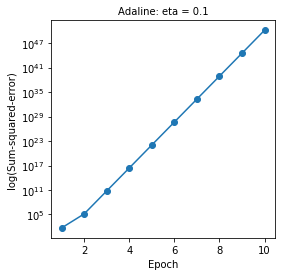

In [118]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.1).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('log(Sum-squared-error)')
ax.set_title('Adaline: eta = 0.1', fontsize ='medium')
plt.show()

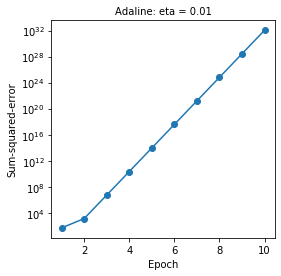

In [119]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.01).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.01', fontsize ='medium')
plt.show()

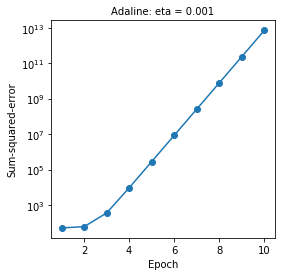

In [120]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.001', fontsize ='medium')
plt.show()

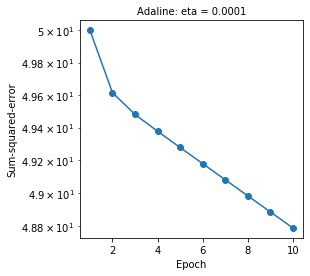

In [121]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize = (4,4))
ada = AdalineGD(n_iter=10, eta=0.0001).fit(NF, NC)
ax.semilogy(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
ax.set_xlabel('Epoch')
ax.set_ylabel('Sum-squared-error')
ax.set_title('Adaline: eta = 0.0001', fontsize ='medium')
plt.show()

In [122]:
# Standardize Inputs

NF_Std = np.copy(NF)
NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

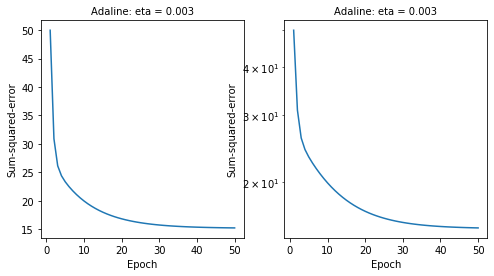

In [123]:
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (8,4))

ada = AdalineGD(n_iter=50, eta=0.003)
ada.fit(NF_Std, NC)
ax[0].plot(range(1, len(ada.cost_) + 1), ada.cost_)
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Sum-squared-error')
ax[0].set_title('Adaline: eta = 0.003', fontsize='medium')
ax[1].semilogy(range(1, len(ada.cost_) + 1), ada.cost_)
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline: eta = 0.003', fontsize='medium')
plt.show()

In [124]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.01):

    # setup marker generator and color map
    colors = ('blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.2, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, label=IC[cdx[idx]])

In [125]:
def second_dimension(first_feature, second_feature):
    global cdx, Cl, IC, pltC, pltM, IrisF
    global twoFeature
    fdx = np.array([first_feature, second_feature]) 

    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 2))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            j += 1
        i += 1
        
    # Standardize Inputs
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()

    # Create Adaline
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)

    # Plot the Graph
    plt.close('all')
    plot_decision_regions(NF_Std, NC, classifier = ada)
    plt.title('Adaline - Gradient Descent', fontsize='medium')
    plt.xlabel(str(IrisF[first_feature])) #fix the label
    plt.ylabel(str(IrisF[second_feature])) #fix the label
    plt.legend(loc='upper left', fontsize='small')
    plt.show()
    twoFeature.append((ada.accuracy(NF_Std, NC)*100))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

Here, we will standardize the inputs for the practical reasons to make the training faster and to avoid getting struck from local optima. Meaning, our Gradient Descent will converge more quickly upon standardization.

In [126]:
def third_dimension(first_feature, second_feature, third_feature):
    global cdx, Cl, IC, pltC, pltM, IrisF
    global threeFeature
    fdx = np.array([first_feature, second_feature, third_feature]) 

    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 3))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            j += 1
        i += 1

    # Standardize Inputs
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
    NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
    
    # Create Adaline
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)
    
    threeFeature.append(((ada.accuracy(NF_Std, NC)*100)))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

In [127]:
def fourth_dimension(first_feature, second_feature, third_feature, fourth_feature):
    global cdx, Cl, IC, pltC, pltM, IrisF
    global fourFeature
    fdx = np.array([first_feature, second_feature, third_feature, fourth_feature]) 

    i = 0
    numCl = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:
            numCl += 1
        if Cl[i] == IC[cdx[1]]:
            numCl += 1    
        i += 1  

    NC = np.zeros((numCl))
    NF = np.zeros((numCl, 4))

    i = 0
    j = 0
    for i in range(0 , len(Cl)):
        if Cl[i] == IC[cdx[0]]:        
            NC[j] = 1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            NF[j,3] = IA[i,fdx[3]]
            j += 1
        if Cl[i] == IC[cdx[1]]:      
            NC[j] = -1
            NF[j,0] = IA[i,fdx[0]]
            NF[j,1] = IA[i,fdx[1]]
            NF[j,2] = IA[i,fdx[2]]
            NF[j,3] = IA[i,fdx[3]]
            j += 1
        i += 1
        
    # Standardize Inputs
    NF_Std = np.copy(NF)
    NF_Std[:,0] = (NF[:,0] - NF[:,0].mean()) / NF[:,0].std()
    NF_Std[:,1] = (NF[:,1] - NF[:,1].mean()) / NF[:,1].std()
    NF_Std[:,2] = (NF[:,2] - NF[:,2].mean()) / NF[:,2].std()
    NF_Std[:,3] = (NF[:,3] - NF[:,3].mean()) / NF[:,3].std()


    # Create Adaline
    ada = AdalineGD(n_iter=50, eta=0.003)
    ada.fit(NF_Std, NC)
    fourFeature.append(((ada.accuracy(NF_Std, NC)*100)))
    print("Adaline Accuracy Level: " + str((ada.accuracy(NF_Std, NC)*100)) + "%")

Here, we used 50 iterations and the learning rate as 0.003. We can change the rate a bit and the results will stay mostly the same. But if we change the numbers significantly, we may have the problem of larger error in every epoch!

## ALL SIX CASES OF USING TWO FEATURES AT A TIME

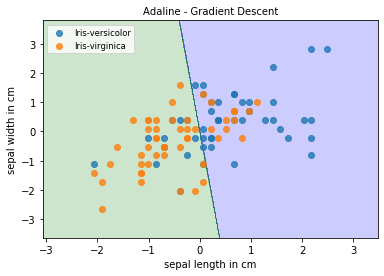

Adaline Accuracy Level: 75.0%


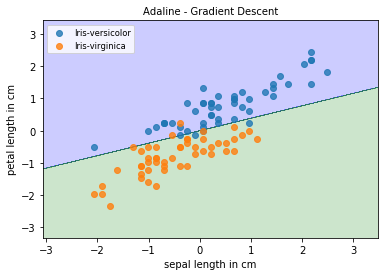

Adaline Accuracy Level: 94.0%


In [128]:
# Sepal Length & Sepal Width
twoFeature_description = []
twoFeature = [];
twoFeature_description.append("Sepal Length & Sepal Width")
second_dimension(0,1)

# Sepal Length & Petal Length
twoFeature_description.append("Sepal Length & Petal Length")
second_dimension(0,2)


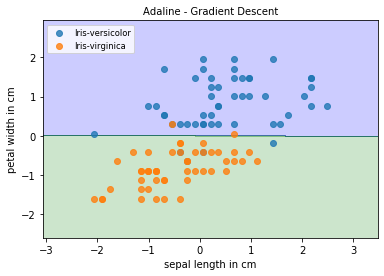

Adaline Accuracy Level: 94.0%


In [129]:
# Sepal Length & Petal Width
twoFeature_description.append("Sepal Length & Petal Width")
second_dimension(0,3)


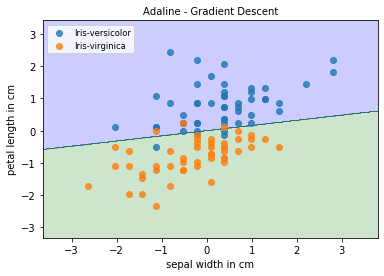

Adaline Accuracy Level: 93.0%


In [130]:
# Sepal Width & Petal Length
twoFeature_description.append("Sepal Width & Petal Length")
second_dimension(1,2)

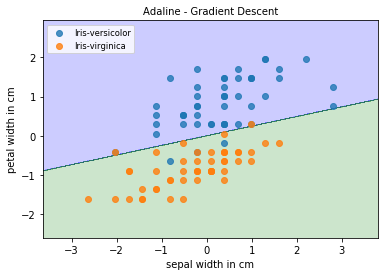

Adaline Accuracy Level: 95.0%


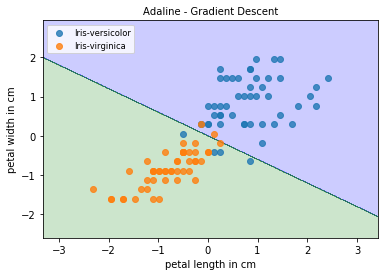

Adaline Accuracy Level: 94.0%


In [131]:
# Sepal Width & Petal Width
twoFeature_description.append("Sepal Width & Petal Width")
second_dimension(1,3)

# Petal Length & Petal Width
twoFeature_description.append("Petal Length & Petal Width")
second_dimension(2,3)

In [132]:
twoFeature

[75.0, 94.0, 94.0, 93.0, 95.0, 94.0]

#### The average of the results is 90.8% . Accuracy level in first case is worst which brings down the overall average. If we neglect the first case, then the average goes up to 94%

## ALL FOUR CASES OF USING THREE FEATURES AT A TIME

In [133]:
threeFeature = []
threeFeature_description = []
# Sepal Length, Sepal Width, Petal Length
threeFeature_description.append("Sepal Length, Sepal Width, Petal Length")
third_dimension(0,1,2)
# Sepal Width, Petal Length, Petal Width
threeFeature_description.append("Sepal Width, Petal Length, Petal Width")
third_dimension(1,2,3)
# Sepal Length, Petal Length, Petal Width
threeFeature_description.append("Sepal Length, Petal Length, Petal Width")
third_dimension(0,2,3)
# Sepal Length, Sepal Width, Petal Width
threeFeature_description.append("Sepal Length, Sepal Width, Petal Width")
third_dimension(0,1,3)

Adaline Accuracy Level: 93.0%
Adaline Accuracy Level: 96.0%
Adaline Accuracy Level: 96.0%
Adaline Accuracy Level: 95.0%


In [134]:
threeFeature

[93.0, 96.0, 96.0, 95.0]

#### On an average, the accuracy is 95%. This average increases if we take just the last three results and leave out the first one which was the case in twoFeature. Hence the results of threeFeature correlates to the twoFeature. 

#### Also, increasing a feature, increased the accuracy.

## THE ONE CASE OF USING ALL FEATURES AT ONCE

In [135]:
fourFeature = []
fourFeature_description = []
# Sepal Length, Sepal Width, Petal Length, Petal Width
fourFeature_description.append("Sepal Length, Sepal Width, Petal Length, Petal Width")
fourth_dimension(0,1,2,3)

Adaline Accuracy Level: 97.0%


In [136]:
fourFeature

[97.0]

#### Increasing another feature resulted the best accuracy.

## CONCLUSION

By comparing Iris-Virginica and Iris-Versicolor, We came to know from the findings that increasing the features helped in improving the accuracy level. Accuracy level is highest in fourFeature at 97%. Sepal width and Sepal length yeilds the worst case accuracy- 75%. Thus, including more dimensions can help when trying to classify this data in Dataset.